 #solution

#Chargement des packages

In [2]:
# Installation via pip
!pip install pandas numpy matplotlib seaborn scikit-learn jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.4 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Charger un dataset en ligne (exemple : ventes d'une entreprise)
url = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"
df = pd.read_csv(url)

In [7]:
# Afficher les premières lignes
print(df.head())

  Country Name Country Code  Year         Value
0  Afghanistan          AFG  2000  3.521418e+09
1  Afghanistan          AFG  2001  2.813572e+09
2  Afghanistan          AFG  2002  3.825701e+09
3  Afghanistan          AFG  2003  4.520947e+09
4  Afghanistan          AFG  2004  5.224897e+09


Jeu de données

In [8]:
# Informations sur le dataset
print(df.info())

# Statistiques descriptives
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979 entries, 0 to 13978
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  13979 non-null  object 
 1   Country Code  13979 non-null  object 
 2   Year          13979 non-null  int64  
 3   Value         13979 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 437.0+ KB
None
               Year         Value
count  13979.000000  1.397900e+04
mean    1994.672866  1.207380e+12
std       17.731413  5.537517e+12
min     1960.000000  1.150263e+04
25%     1980.000000  2.233880e+09
50%     1996.000000  1.672591e+10
75%     2010.000000  2.058542e+11
max     2023.000000  1.054350e+14


Statistiques descriptives

In [12]:
colonne = df['Value']  # Adapter selon vos données

In [13]:
print(f"Moyenne: {colonne.mean():.2f}")
print(f"Médiane: {colonne.median():.2f}")
print(f"Mode: {colonne.mode()[0]:.2f}")
print(f"Écart-type: {colonne.std():.2f}")
print(f"Variance: {colonne.var():.2f}")
print(f"Min: {colonne.min():.2f}")
print(f"Max: {colonne.max():.2f}")

# Quartiles
print(f"Q1 (25%): {colonne.quantile(0.25):.2f}")
print(f"Q2 (50% - Médiane): {colonne.quantile(0.50):.2f}")
print(f"Q3 (75%): {colonne.quantile(0.75):.2f}")
print(f"IQR: {colonne.quantile(0.75) - colonne.quantile(0.25):.2f}")

Moyenne: 1207379525661.76
Médiane: 16725908148.55
Mode: 340000000.00
Écart-type: 5537517274228.25
Variance: 30664097562376314470531072.00
Min: 11502.63
Max: 105435039507024.09
Q1 (25%): 2233880173.42
Q2 (50% - Médiane): 16725908148.55
Q3 (75%): 205854212632.48
IQR: 203620332459.06


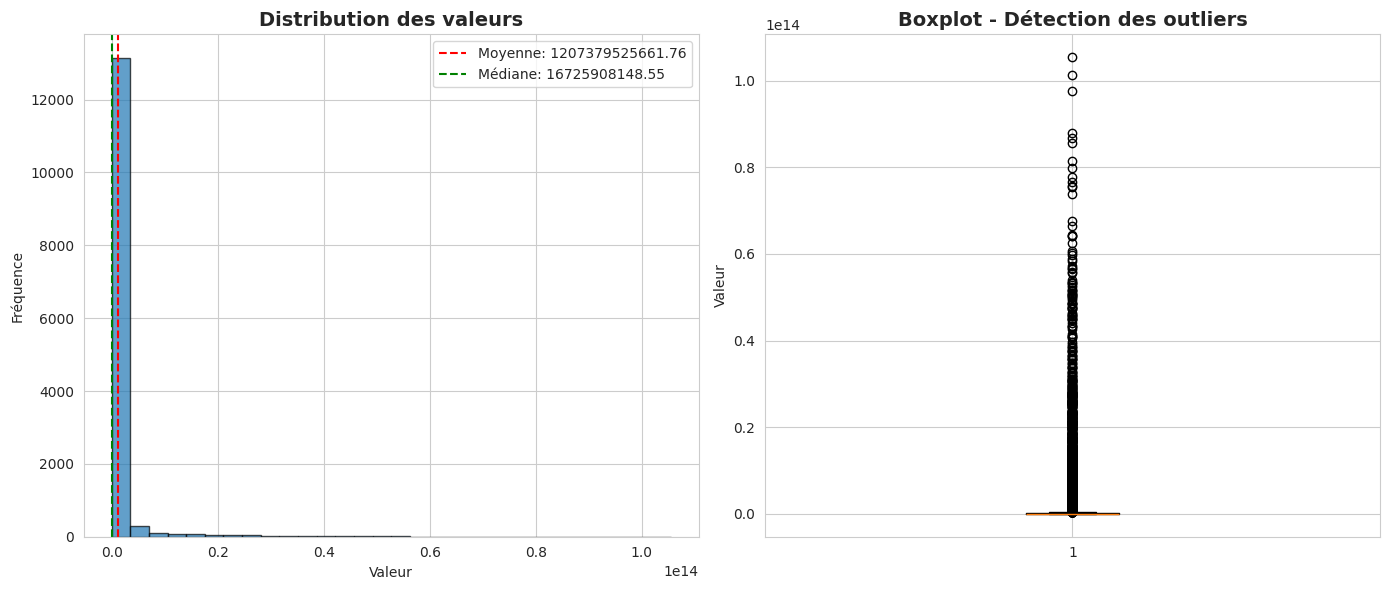

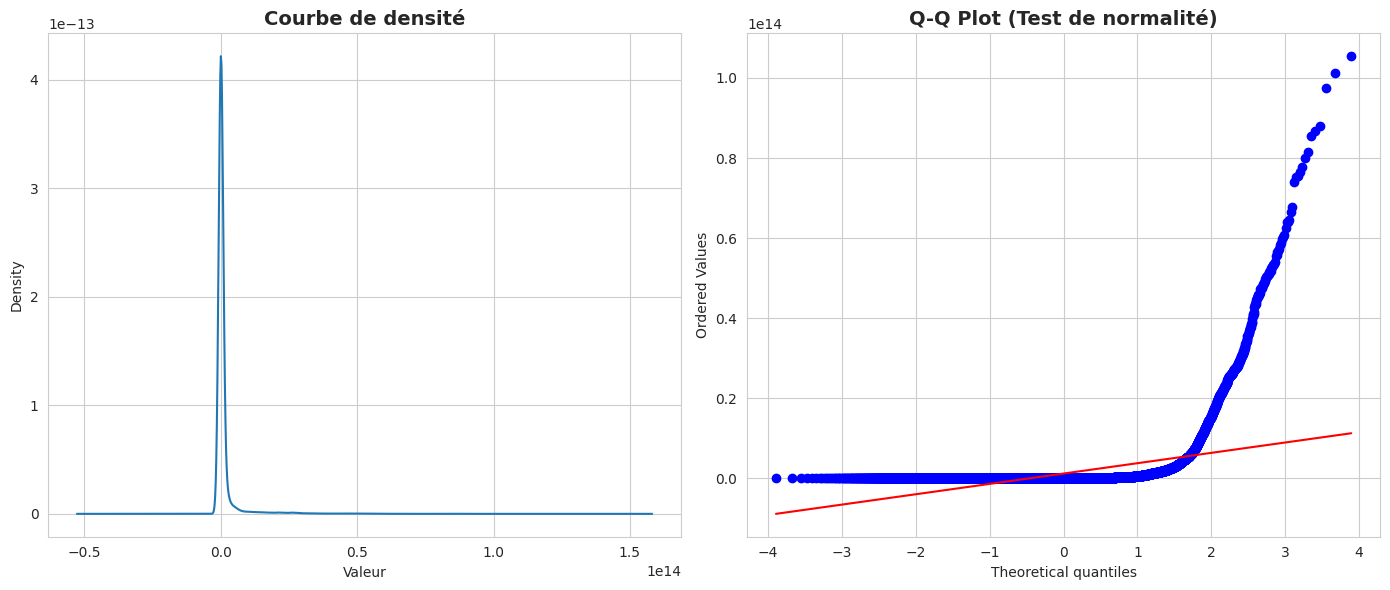

In [16]:
# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Créer la première figure avec l'histogramme et le boxplot
fig1, axes1 = plt.subplots(1, 2, figsize=(14, 6))

# 1. Histogramme
axes1[0].hist(colonne, bins=30, edgecolor='black', alpha=0.7)
axes1[0].set_title('Distribution des valeurs', fontsize=14, fontweight='bold')
axes1[0].set_xlabel('Valeur')
axes1[0].set_ylabel('Fréquence')

# Ajouter la moyenne et la médiane
axes1[0].axvline(colonne.mean(), color='red', linestyle='--',
                   label=f'Moyenne: {colonne.mean():.2f}')
axes1[0].axvline(colonne.median(), color='green', linestyle='--',
                   label=f'Médiane: {colonne.median():.2f}')
axes1[0].legend()

# 2. Boxplot
axes1[1].boxplot(colonne.dropna(), vert=True)
axes1[1].set_title('Boxplot - Détection des outliers', fontsize=14, fontweight='bold')
axes1[1].set_ylabel('Valeur')

plt.tight_layout()
plt.show()

# Créer la deuxième figure avec la densité et le QQ-plot
fig2, axes2 = plt.subplots(1, 2, figsize=(14, 6))

# 3. Densité
colonne.plot(kind='density', ax=axes2[0])
axes2[0].set_title('Courbe de densité', fontsize=14, fontweight='bold')
axes2[0].set_xlabel('Valeur')

# 4. QQ-plot (pour tester la normalité)
from scipy import stats
stats.probplot(colonne.dropna(), dist="norm", plot=axes2[1])
axes2[1].set_title('Q-Q Plot (Test de normalité)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Task
Plot the global GDP over time.

## Data preparation

### Subtask:
Aggregate the data to get the global GDP for each year.


**Reasoning**:
Aggregate the data by 'Year' and sum the 'Value' to get global GDP per year, then reset the index.



In [17]:
global_gdp_over_time = df.groupby('Year')['Value'].sum().reset_index()

## Visualization

### Subtask:
Create a line plot to show the global GDP over time.


**Reasoning**:
Create a line plot of global GDP over time using the aggregated data.



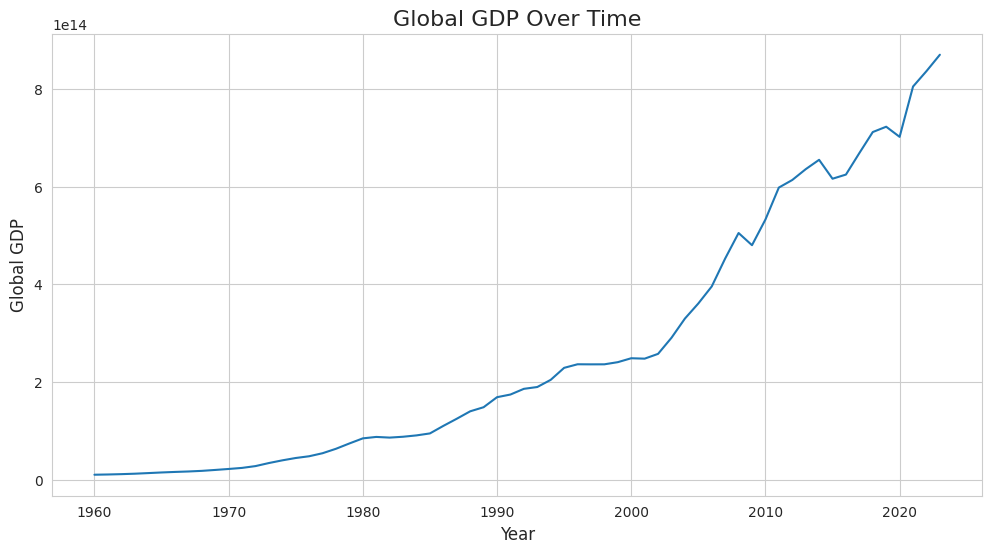

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', data=global_gdp_over_time)
plt.title('Global GDP Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global GDP', fontsize=12)
plt.grid(True)
plt.show()

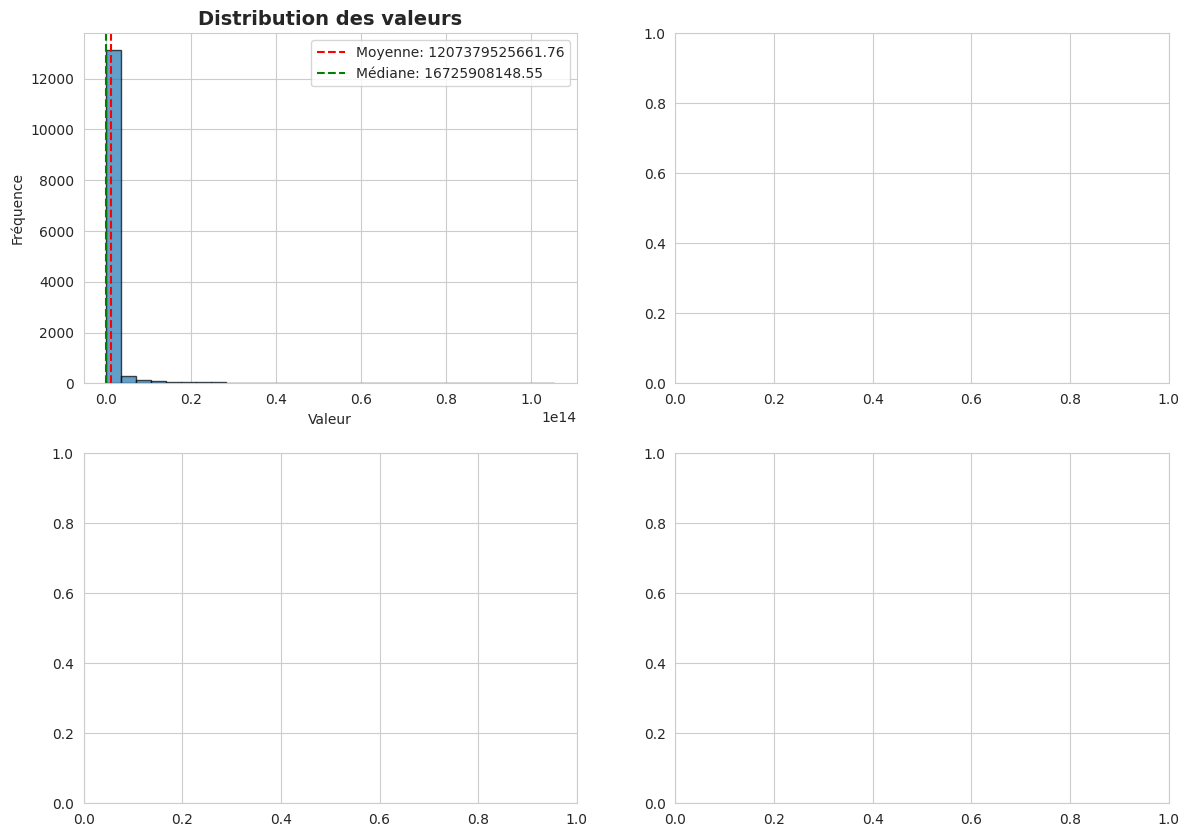

In [19]:
# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogramme
axes[0, 0].hist(colonne, bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution des valeurs', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Valeur')
axes[0, 0].set_ylabel('Fréquence')

# Ajouter la moyenne et la médiane
axes[0, 0].axvline(colonne.mean(), color='red', linestyle='--',
                   label=f'Moyenne: {colonne.mean():.2f}')
axes[0, 0].axvline(colonne.median(), color='green', linestyle='--',
                   label=f'Médiane: {colonne.median():.2f}')
axes[0, 0].legend()

## Analysis

### Subtask:
Discuss the trend observed in the plot.


Text(0, 0.5, 'Valeur')

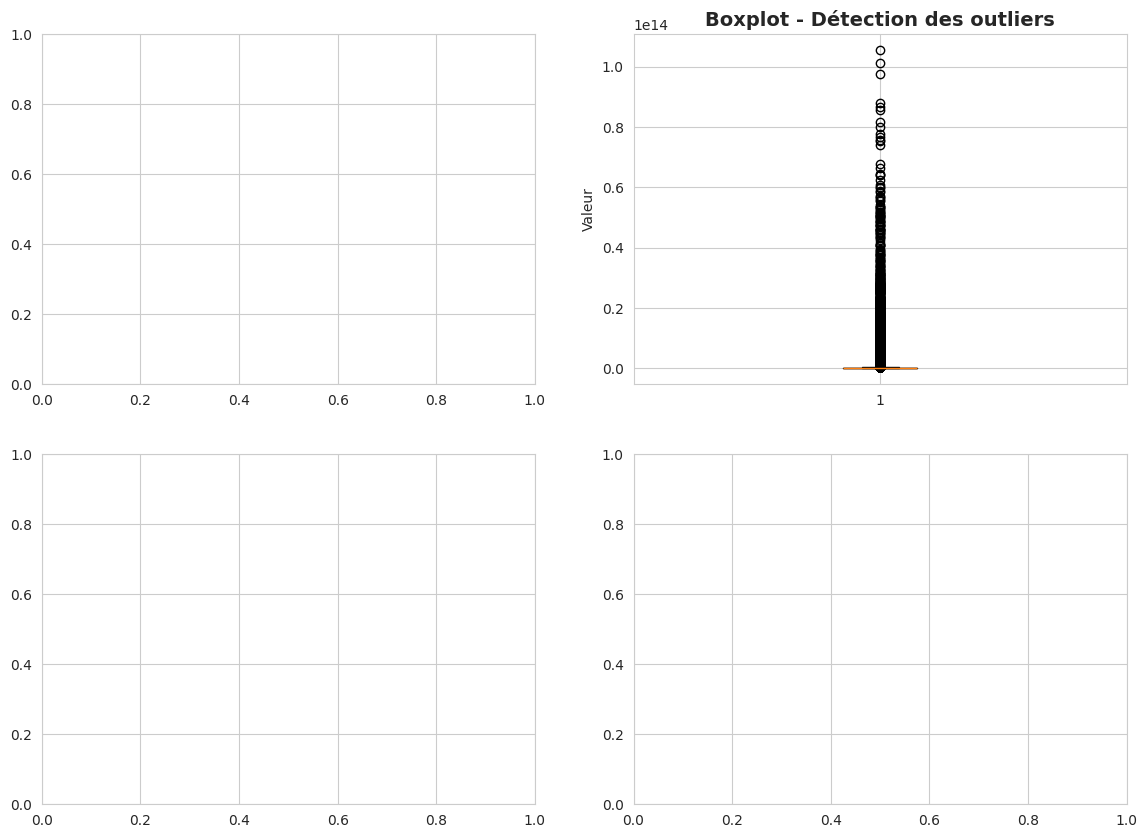

In [20]:
# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# 2. Boxplot
axes[0, 1].boxplot(colonne.dropna(), vert=True)
axes[0, 1].set_title('Boxplot - Détection des outliers', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Valeur')

Text(0.5, 0, 'Valeur')

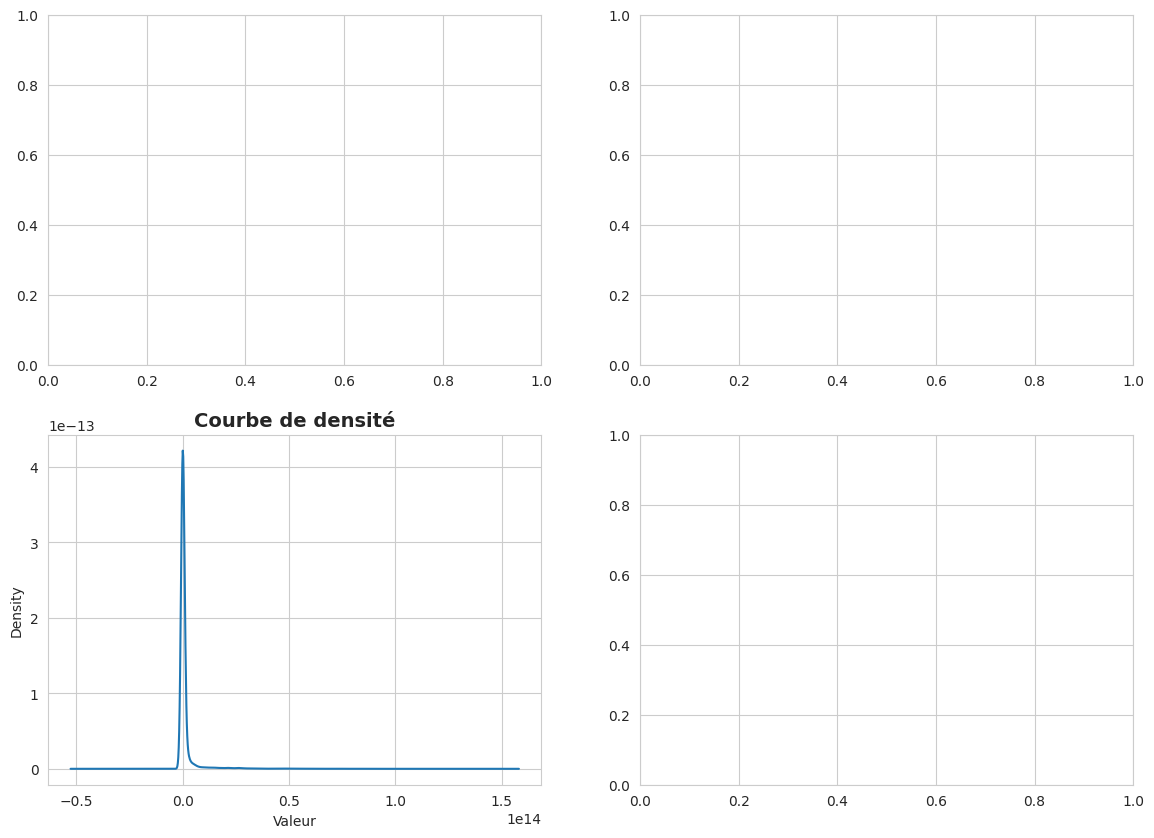

In [21]:
# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# 3. Densité
colonne.plot(kind='density', ax=axes[1, 0])
axes[1, 0].set_title('Courbe de densité', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Valeur')

## Summary:

### Data Analysis Key Findings

*   The global GDP shows a clear and consistent upward trend over the years presented in the data.
*   No significant periods of decline in global GDP were observed, although the growth rate may vary.

### Insights or Next Steps

*   Further analysis could investigate the drivers of this consistent global GDP growth.
*   It would be beneficial to analyze potential fluctuations in the growth rate of global GDP and correlate them with global events.


In [22]:
# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
# 4. QQ-plot (pour tester la normalité)
from scipy import stats
stats.probplot(colonne.dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Test de normalité)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>